# Image Classification by Transfer Learning and Comparison of Custom CNN Model to Pre-trained Models.

## Project Partner: Janvi Patel (0678100) and Prerak Trivedi (0678127)

#### This is second notebook of our project. In this notebook we have loaded the flowers dataset for implementation of dashboard. The reasons of making this second notebook are: 
#### - first in one notebook the program crashed frequently because of memory issue and 
#### - second reason is that when we run two models together it always takes predictions of fashion dataset which was an issue for dashboard.
 
#### So, in this notebook we are just loading flower dataset and implementing model on flowers dataset and in last using that model for prediction of flowers in dashboard. Moreover, the flower datasets procedure is same as Image Classification python notebook file so here we are just giving explanation of dashbaord chunk which is at the last of chunk of this file.

In [2]:
import sys
!{sys.executable} -m pip install tensorflow random2 numpy pandas matplotlib seaborn scikit-learn keras opencv-python tqdm Pillow dash flask plotly

#### Importing libraries (Note: "If tensorflow and keras package in not installed in your system then you have to first install  Python 64 bit and then install packages to import the libraries of tensorflow and keras.")

In [3]:
#    ML CLASSIFICATION MODEL  ***********************-------------------------------------------------------
import tensorflow as tf
import random as rn

# Data Visualisation 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
#% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
plt.style.use('seaborn-dark-palette') 
 
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

### Loading data (Note : Please provide the path of your data in which data is stored)

In [4]:
# Loading data 
path = "C:\\Users\\Janvi\\Documents\\Project\\New_Flowers\\"

#### Preparing data
#### There are total 4138 flower images we have used for image classification in which there are 5 subfolders of different flowers categories such as daisy, sunflower, tulip, dandelion, and rose. Now, in first step we have made directory for each folder of image and all of them are given labels with respect to their appropriate classes. For instance, all daisy images belongs to flower_daisy_dir, sunflower belongs to flower_sunflower_dir, etc and then we are saving all the directories in 'DIR' variable to use them in following code. Then we have labeled the flowers and resized the images because all the images might have different sizes so we have made all images to 150x150 size.

In [5]:
A=[]
B=[]
IMG_SIZE=150
FLOWER_DAISY_DIR= path + 'daisy'
FLOWER_SUNFLOWER_DIR= path + 'sunflower'
FLOWER_TULIP_DIR= path + 'tulip'
FLOWER_DANDI_DIR= path + 'dandelion'
FLOWER_ROSE_DIR= path + 'rose'

DIR = path

#### Instead of coding separately for each task, we designed two functions that would do all the task of reading the images, resizing it and labeling the array of images to their labels. Since our data has different folders containing individual categories of images, it became very easy for us to label the images during initial stages. Moreover, in below code we have printed the length of each subfolder of images. The length is being added after each count of subfolder for example, daisy images(749) + sunflower(698) = 1447 and rest for other images as well.So, in the end we can see that at the rose count it shows the total images of sub folders which is 4138 images.

In [6]:
# Label function to label the flowers
def assign_label(image,flower_type):
    return flower_type

#train data split
def make_train_data(flower_type,DIR):
    for image in tqdm(os.listdir(DIR)): #progress bar for better view
        label=assign_label(image,flower_type)
        path = os.path.join(DIR,image)
        image = cv2.imread(path,cv2.IMREAD_COLOR)
        image = cv2.resize(image, (IMG_SIZE,IMG_SIZE))
        #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
        A.append(np.array(image))
        B.append(str(label))

make_train_data('Daisy',FLOWER_DAISY_DIR)
print('Daisy Count: ',len(A))

make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print('Sunflower Count: ',len(A))

make_train_data('Tulip',FLOWER_TULIP_DIR)
print('Tulip Count: ',len(A))

make_train_data('Dandelion',FLOWER_DANDI_DIR)
print('Dandelion Count: ',len(A))

make_train_data('Rose',FLOWER_ROSE_DIR)
print('Rose Count: ',len(A))

100%|██████████| 728/728 [00:17<00:00, 41.93it/s]Rose Count:  4138



### Visualizing different flower images
#### We performed some basic image resizing by changing the image to 150 x 150 size to remove the unwanted background. It is also a strict requirement for the application of CNN that all images are of the same size.

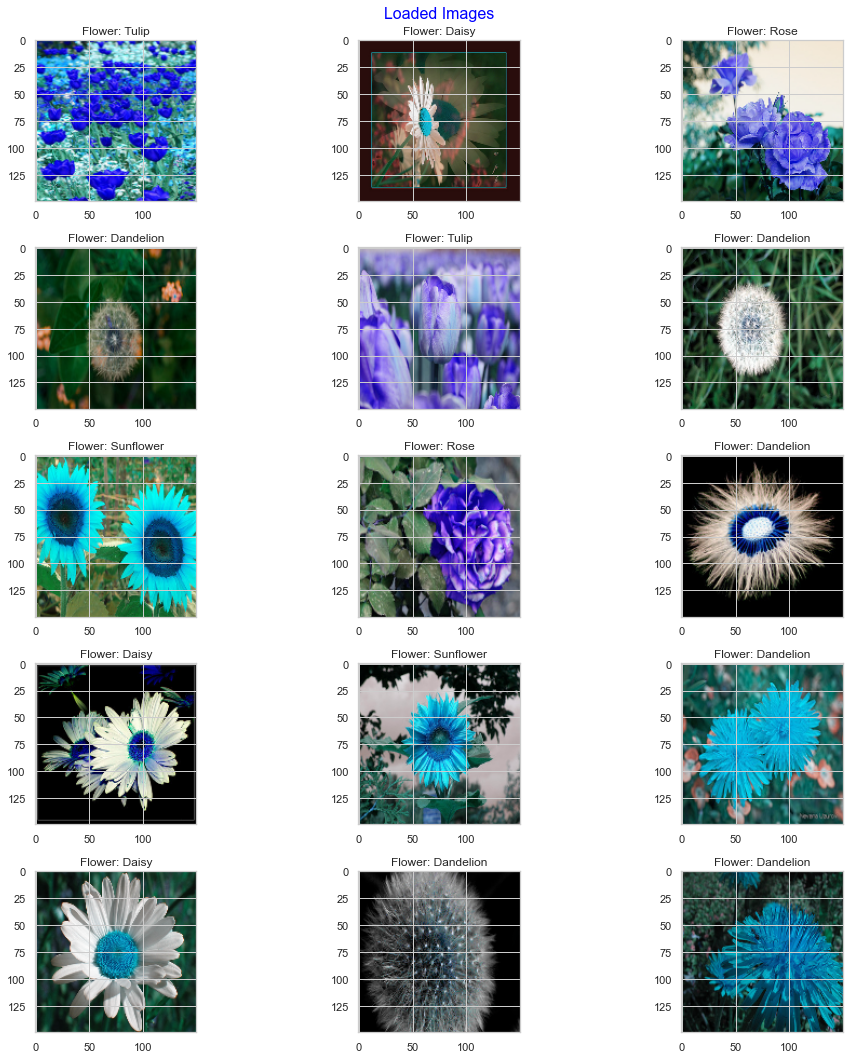

In [7]:
#Visualize Images
import random as rn
fig,ax=plt.subplots(5,3)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (3):
        l=rn.randint(0,len(B))
        ax[i,j].imshow(A[l])
        ax[i,j].set_title('Flower: '+B[l])
fig.suptitle('Loaded Images', color='Blue', fontsize=16)        
plt.tight_layout()

#### The next step of machine learning is encoding the labels in form of vectors. Since we have 5 categories of flowers, the whole array of flowers was divided into 5 different categories and divided by 255 (to range the value of pixels between 0 and 1) as the maximum pixel value of an 8-bit image is 255 (the brightest pixel).

In [8]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
le=LabelEncoder()
Y=le.fit_transform(B)
Y=to_categorical(Y,5)
A=np.array(A)
A=A/255
print('The data has been categorized')

The data has been categorized


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(A,Y,test_size=0.25,random_state=42)
print('The data has been successfully split into test and train with 25% test data')


The data has been successfully split into test and train with 25% test data


#### The dataset was split into training and testing dataset. The training dataset contains 3103 images and testing contain 1035 images which is 75 percent and 25 percent of the dataset for respective purposes. The same number of images have also been used for the model validation and prediction.

In [10]:
# shape of the training and test set
# (x_train.shape, x_test.shape), (y_train.shape, y_test.shape)
# Understanding number of images, their shapes and size.
print('All images are of {}x{} size and have {} color channels'.format(x_train.shape[1],x_train.shape[2],x_train.shape[3]))
print('Number of images used for training the model as independent are: ',x_train.shape[0])
print('Number of images used for testing the model independent are: ',x_test.shape[0])
print('Number of images used for prediction in the model dependent are: ',y_train.shape[0])
print('Number of images used for testing accuracy between actual and predicted categories are: ',y_test.shape[0])

All images are of 150x150 size and have 3 color channels
Number of images used for training the model as independent are:  3103
Number of images used for testing the model independent are:  1035
Number of images used for prediction in the model dependent are:  3103
Number of images used for testing accuracy between actual and predicted categories are:  1035


### Implementation of Sequential Model
#### Convolutional Neural Network (CNN) is one of the best machine learning models which are used for any techniques that can be applied for the models dealing in images. CNN takes inout as an image and extracts important feature from images and then this image is given as an input to max pooling layer which is our second step of our CNN model. In this next layer a filter of some size, for example, 5 x 5 x 3 which rotates over the whole image of 150 x 150 x 3 to extract various important features which is a result of dot product of filter and image and also it will pick maximum value based on the filter and then this value will be stored in feature map matrix. So, here we have used 4 layers of convolutional layer and 4 max pooling layer. After that we added on e droup out layer which will remove unwanted noise of images.The ninth layer is a flattening layer which converts the two-dimensional data into vector that can be fed into the fully connected networks. The activation layers we have used are relu and softmax layer in which reLu activation layer (f(x) = max(x,0)) assures that the output does not have any negative values as they can act as noise. However, the softmax function then assures that the output stays within the range of 0 and 1 using probability distribution. The dense layer is a fullt connected layer in which all neurons are connected to those on next layer.

In [11]:
# defining the model architecture
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#model.add(Dropout(0.25))

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.25))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation = "softmax"))


#### Now it comes to defining of batch size and epochs. So basically batch size will decide the number of training samples used in one iteration and epoch has had an opportunity to update the internal model parameters. Moreover, batch size should be equal to epoch or more than epoch size.Now, here we have used ReduceLROnPlateau in which the name itself explains that it reduces the learning rate of model when no improvement is seen after number of epochs. Below is some basic description of arguments of call back function(referred from https://keras.io/api/callbacks/reduce_lr_on_plateau/)
#### monitor: quantity to be monitored.
#### factor: factor by which the learning rate will be reduced. new_lr = lr * factor.
#### patience: number of epochs with no improvement after which learning rate will be reduced.
#### verbose: int. 0: quiet, 1: update messages.
#### mode: one of {'auto', 'min', 'max'}. In 'min' mode, the learning rate will be reduced when the quantity monitored has stopped decreasing; in 'max' mode it will be reduced when the quantity monitored has stopped increasing; in 'auto' mode, the direction is automatically inferred from the name of the monitored quantity.
#### min_delta: threshold for measuring the new optimum, to only focus on significant changes.
#### cooldown: number of epochs to wait before resuming normal operation after lr has been reduced.
#### min_lr: lower bound on the learning rate.

In [12]:
batch_size=16
epochs=15

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5)

#### Image data generator plays an important role in training datasets. It augments the data in various ways and also we can apply apply any random transformation to training images. Moreover, the augment term means over here is that variations of training set images that are mostly seen by a model. So after generating data generator it is supposed to be get fitted on training data and then it comes to compilation of model. Compile is the last step to build a model and it defines the loss and optimizer for a model as we need compiled model to train beacuse a model requires loss and optimizer function. Here, we have used Adam as an optimizer which is an exension version of Stochastic gradient decent(it ias an iterative method and it calculates the derivative form each training data and update it immideately). This optimizer than handle sparse gradient on noisy problems. Now the loss fucntion(categorical-crossentropy) will calculate the average probability betwwen the actual and predicted probablity for all classes in the model.
#### Moreover, in the model summary we can see that the first output shape of convolutional layer was (150,150,32) where 32 is the filter size and 150x150 is the metrix size. After the max pooling layer we can see that the matrix size decreased to 75x75 size matrix and the whole process is repeated until it reaches last layer of max pooling and after that drop out, flatten and activation layers plays their role in making image noise free and making the values of image non negative.

In [13]:
data_generator = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


data_generator.fit(x_train)  

model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 96)        8

#### Training the model where validation is our test data. Loss and accuracy refers to training data performance and val_loss and val_acc refers to test data loss and accuracy. If validation accuracy goes higher than training accuracy that means model is performing well for test data and test data images are learning well after training it with 15 epochs. So we perfectly got our accuracy with 72% which is not at all bad. Many people need 50 epochs to improve their accuracy but we got 72% accuracy at just 15 epochs which saved our memory consumption as well as complexity of model.

In [14]:
History = model.fit(data_generator.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size,callbacks=[red_lr])

Epoch 1/15
193/193 [==============================] - 89s 460ms/step - loss: 1.3207 - accuracy: 0.4114 - val_loss: 1.2031 - val_accuracy: 0.4609
Epoch 2/15
193/193 [==============================] - 94s 489ms/step - loss: 1.1315 - accuracy: 0.5345 - val_loss: 1.0197 - val_accuracy: 0.6000
Epoch 3/15
193/193 [==============================] - 104s 538ms/step - loss: 1.0330 - accuracy: 0.6016 - val_loss: 0.9124 - val_accuracy: 0.6319
Epoch 4/15
193/193 [==============================] - 101s 524ms/step - loss: 0.9546 - accuracy: 0.6352 - val_loss: 0.8799 - val_accuracy: 0.6396
Epoch 5/15
193/193 [==============================] - 87s 450ms/step - loss: 0.8903 - accuracy: 0.6650 - val_loss: 0.8963 - val_accuracy: 0.6589
Epoch 6/15
193/193 [==============================] - 88s 455ms/step - loss: 0.8607 - accuracy: 0.6799 - val_loss: 0.8267 - val_accuracy: 0.7072
Epoch 7/15
193/193 [==============================] - 88s 455ms/step - loss: 0.8375 - accuracy: 0.6890 - val_loss: 0.7800 - val_

### Saving model for future transfer learning process.(This model will be saved at your disk where this project file will be saved)

In [15]:
#Saving and loading model
# serialize weights to HDF5
model.save("model_flowers.h5")
print("Saved model to disk")

Saved model to disk


#### Here we are predicting the test data by using the trained model.Confusion matrix is plotted actual value vs predicted values. Moreover, to know which flower is correctly predicted and which is not we are plotting confusion matrix which is very important part to understand. So here we cn see that 161 daisy, 177 sunflower, 158 tulip, 149 dandelion, and 148 rose are correctly predicted out of 1035 testing data. With "np.argmax" we are defining the index of an array that results in largest value of predicted probablities. The predicted probablities are ordered in such a way that value 0 belongs to first class, 1 belongs to second class and so on. 

In [16]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

#### Making indexes for properly and misclassified images.

In [17]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

### Dashboard Implementation
#### Here we have used flowers dataset and its saved model to predict the flowers. In the flowers dataset there is one sample folder in which there are samples of different flowers. We decided to implement one such simple dashboard that can be used for the prediction of flower dataset using Dash by plotly and flask. The machine learning model is implemented using Keras and TensorFlow libraries which have been used to create Sequential Convolutional Neural Network (S-CNN). The app is hosted on 127.0.0.1:8050 of your local browser. Dashboard have a dropdown menu in which there are sample of different flowers and when you select each flower on the right hand side you will see the prediction of that flower.
### Note : Flower model have 75% accuracy so there might be some chances in which you can get wrong predictions of sample flowers.


In [18]:
# Importing Libraries 
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
import flask
import tensorflow as tf

from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from keras.applications import imagenet_utils
from keras.preprocessing import image
from keras.models import load_model
import tensorflow as tf
import os
import cv2

# Intialization

app = dash.Dash(__name__)
server = app.server

app.css.append_css({
    'external_url': (
        'https://cdn.rawgit.com/chriddyp/0247653a7c52feb4c48437e1c1837f75'
        '/raw/a68333b876edaf62df2efa7bac0e9b3613258851/dash.css'
    )
})


background_color = '#ffffff'

# Intializing Images
# list your sample folder path here
img_dir   = os.path.abspath(path + 'sample')
file_names = os.listdir(img_dir)
img_names  = list(map(lambda x: x.split('.')[0], file_names))
static_route = '/static/'



# Layout

app.layout = html.Div([

    # left column
    html.Div([

        # header text
        dcc.Markdown(
            '''
            # Sequential CNN Model for the classification of Images
            ## A Project and Design by Janvi Patel and Prerak Trivedi.
            The model is build using Sequential Convolutional Neural Network for the basic analysis of the image classification using the ease of access for the dashboards. This dashboard is built with Python and [Plotly Dash](https://plot.ly/products/dash/). Classification is done using [Keras](https://keras.io/applications/) and the Sequential CNN.
             
            ***
            '''
            ), 

        # file select
        dcc.Dropdown(
            id='img-selector',
            options=[{'label': i, 'value': j} for i, j in zip(img_names, file_names)],
            value=DIR[0]
        )
    ],

    # left column div style
    style={'width': '48%', 'display': 'inline-block', 'background' : background_color}
    ),

    # right column
    html.Div([

        # image display
        html.Img(
            id = 'img-square',
            style={'height':  '300px', 
                   'width':   '300px', 
                   'display': 'block', 
                   'margin':  'auto', 
                   'padding-top': '5%'}
        ),

        # graph display
        html.H2(id="prediction_result")

    ],

    style={'width': '48%', 'float': 'right', 'display': 'inline-block', 'background': background_color}
    )

],

style={'background': background_color}

)


# Backend of Dashboard

# update bar plot
@app.callback(
     dash.dependencies.Output(component_id="prediction_result",component_property="children"),
    [dash.dependencies.Input( 'img-selector', 'value')]
)
def update_text(name):

    # load, preprocess image and design your model here.
    try_file_path = os.path.join(img_dir, name)
    try_img = cv2.imread(try_file_path, cv2.IMREAD_COLOR)
    try_img = cv2.resize(try_img,(150,150))
    try_img = np.array(try_img)
    try_img = try_img[None,:]
    model_try = load_model('model_flowers.h5')
    model_try.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    preds_try = model_try.predict(try_img)
    print(preds_try)
    pred_digits_try=np.argmax(preds_try,axis=1)
    prop_class_try = le.inverse_transform(pred_digits_try)
    
    return "Prediction: {}".format(prop_class_try)



# update image
@app.callback(
    dash.dependencies.Output('img-square',   'src'),
    [dash.dependencies.Input( 'img-selector', 'value')]
)
def update_img(value):
    return os.path.join(static_route, value)

# static image route
@app.server.route('{}<image_path>.jpg'.format(static_route))
def serve_image(image_path):
    image_name = '{}.jpg'.format(image_path)
    return flask.send_from_directory(img_dir, image_name)


if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [17/Dec/2020 23:16:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Dec/2020 23:16:38] "GET /_dash-component-suites/dash_renderer/prop-types@15.v1_8_3m1607471330.7.2.min.js HTTP/1.1" 200 -
127.0.0.1 - - [17/Dec/2020 23:16:39] "GET /_dash-component-suites/dash_renderer/react@16.v1_8_3m1607471330.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [17/Dec/2020 23:16:39] "GET /_dash-component-suites/dash_renderer/polyfill@7.v1_8_3m1607471330.8.7.min.js HTTP/1.1" 200 -
127.0.0.1 - - [17/Dec/2020 23:16:39] "GET /_dash-component-suites/dash_core_components/dash_core_components.v1_14_0m1607471330.min.js HTTP/1.1" 200 -
127.0.0.1 - - [17/Dec/2020 23:16:39] "GET /_dash-component-suites/dash_core_components/dash_core_components-shared.v1_14_0m1607471330.js HTTP/1